# Data Processing and Visualization in Python

## Creating our Dataset

We have our individual chromosome datasets, but let's make a full genome dataset by combining all chromosomes together.
1. Open a Shell
2. Navigate to the directory containing the raw data files
3. Concatenate the header with all of the individual chromosome files into a file called `human_full.txt`
```shell
cat header.txt human_chr*.txt > human_full.txt
```

## Plotting using `ggplot`

- `ggplot` does not come with with `Anaconda`, but it is easy to install
```bash
conda install -c conda-forge ggplot
# -c means channel, which indicates the repository that conda will search
# backup command
# pip install -U ggplot
```
- Open a new Jupyter notebook
```bash
jupyter notebook
# click on New -> Python3
```

#### Let's read in our full dataset and calculate proportion GC content and gene content
- first save the Jupyter notebook as `ggplot_plotting`

In [1]:
import pandas as pd

#### \~\~Challenge\~\~
1. Import `human_full.txt` using `pandas`
2. Calculate proportion GC content and gene content

In [3]:
human = pd.read_csv("human_full.txt", sep="\t")
human.head()

,chromosome,win_start,win_end,n_bases,gc_bases,exon_bases,simple_rep_bases,complex_rep_bases
0,chr1,0,12447821,203509,6163179,4028901.0,255782.0,5034885.0
1,chr1,12447821,24895642,100000,5878447,4174964.0,189162.0,6262883.0
2,chr1,24895642,37343463,1602,5836320,4103583.0,182090.0,6687536.0
3,chr1,37343463,49791284,0,5553627,4410734.0,151595.0,6844291.0
4,chr1,49791284,62239105,0,5201735,2417683.0,153685.0,6638154.0


In [4]:
human['gc_content'] = human['gc_bases'] / (human['win_end'] - human['win_start'])
human['gene_content'] = human['exon_bases'] / (human['win_end'] - human['win_start'])

#### Now we can begin learning how to plot using `ggplot`

In [5]:
# must load package first
from ggplot import *

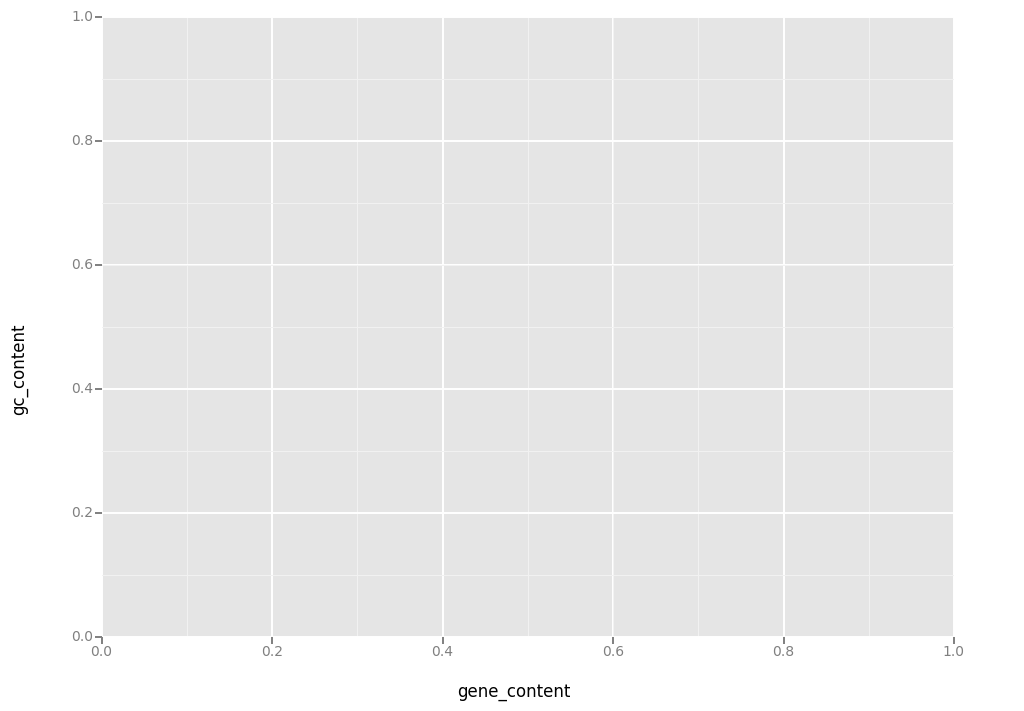

<ggplot: (293599997)>

In [7]:
# now let's create our first plot
p = ggplot(aes(x='gene_content', \
              y='gc_content'), data=human)
p
# but we only see a coordinate plot
# need to layer on our data

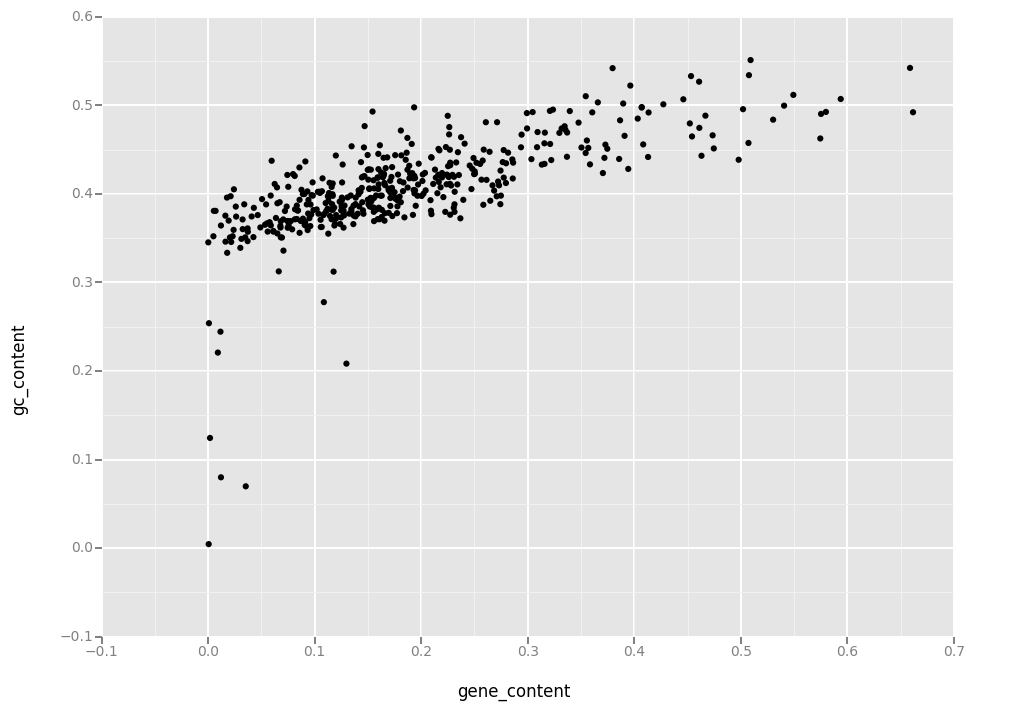

<ggplot: (-9223372036561618267)>

In [8]:
p = ggplot(aes(x='gene_content', \
              y='gc_content'), data=human)
p + geom_point()
p

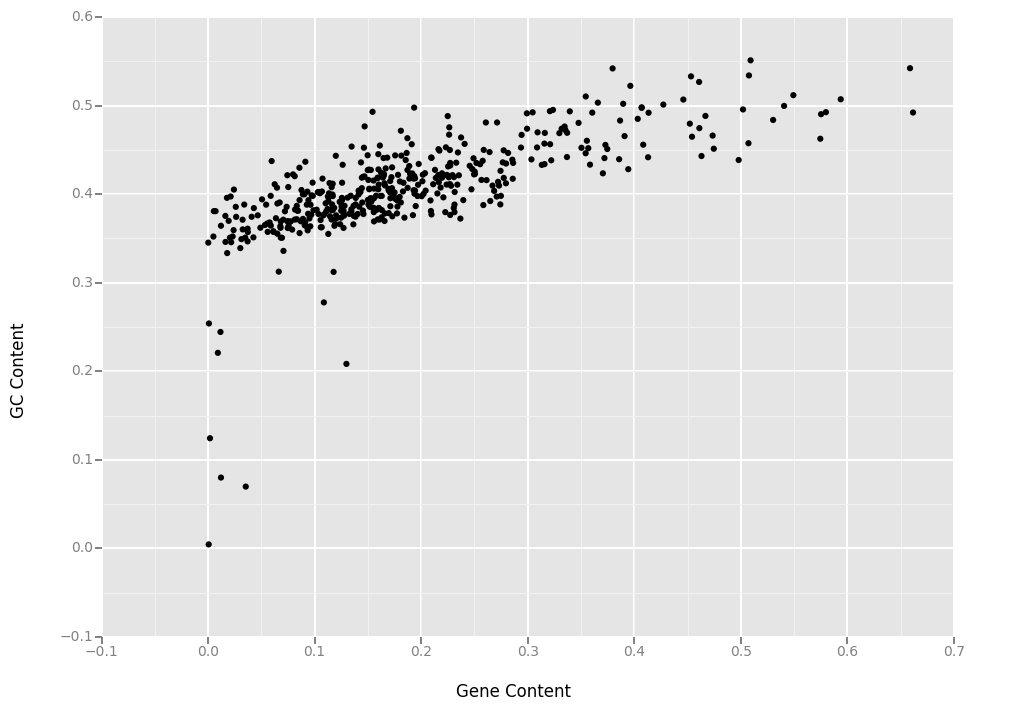

<ggplot: (272883425)>

In [10]:
# cool! but look at those ugly axis labels
p = ggplot(aes(x='gene_content', \
               y='gc_content'), data=human) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p

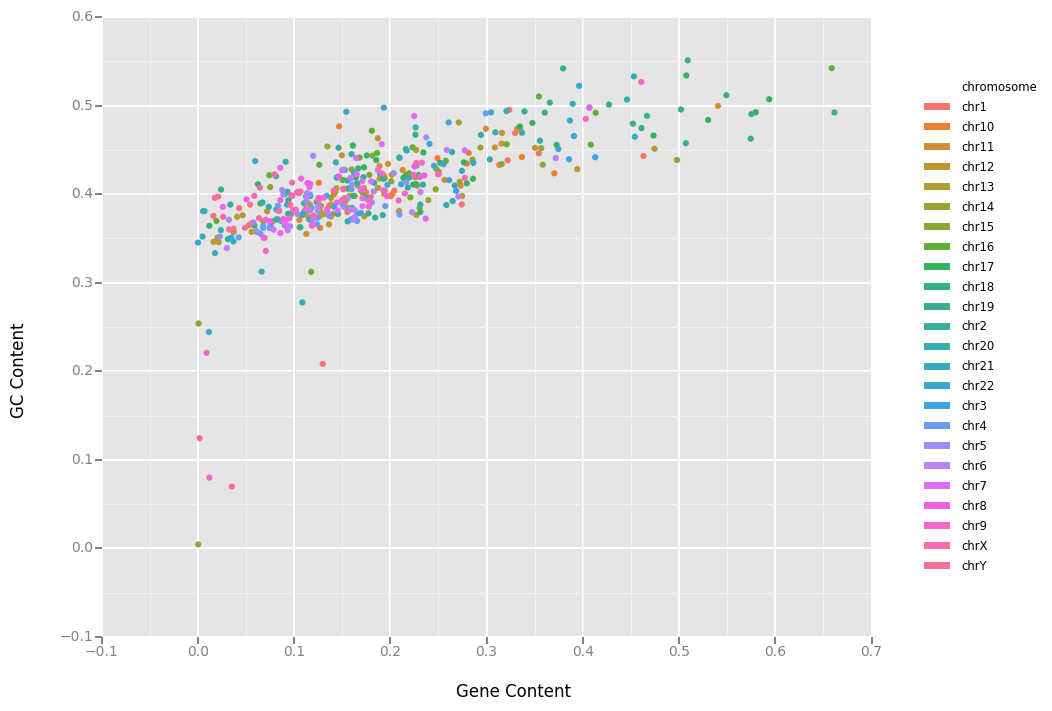

<ggplot: (-9223372036561867730)>

In [14]:
# awesome. but this represents all chromosomes
# how can we visualize with chromosomes... add color
p = ggplot(aes(x='gene_content', \
               y='gc_content', color='chromosome'), \
               data=human) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p

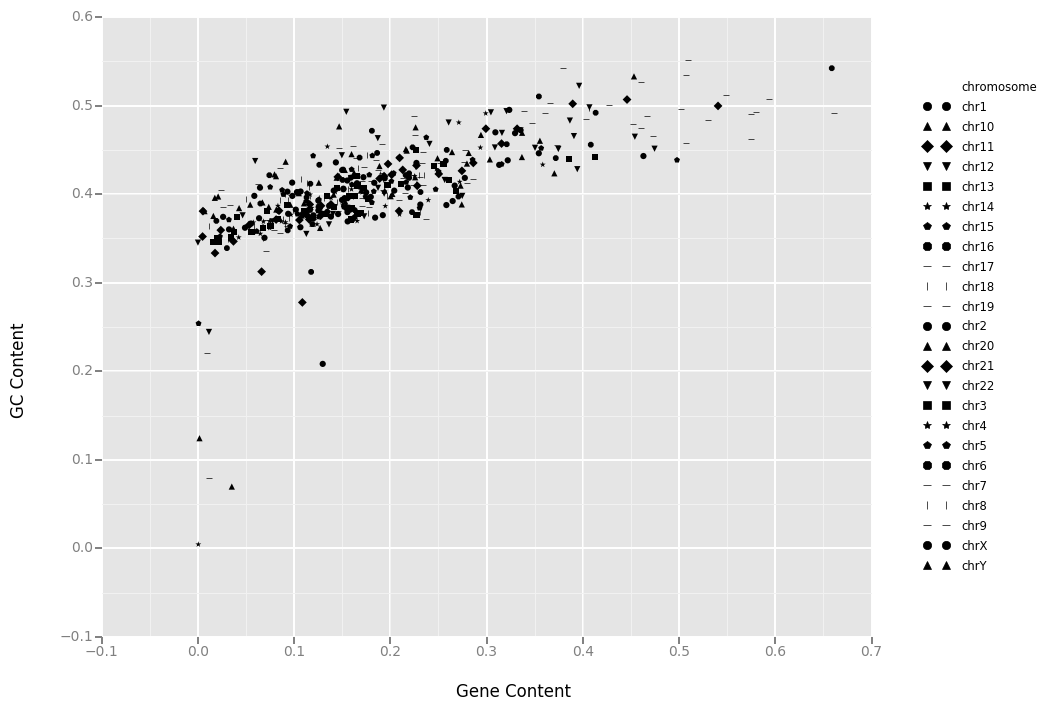

<ggplot: (293708138)>

In [15]:
# or we can do it by shape
p = ggplot(aes(x='gene_content', \
               y='gc_content', shape='chromosome'), \
               data=human) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p

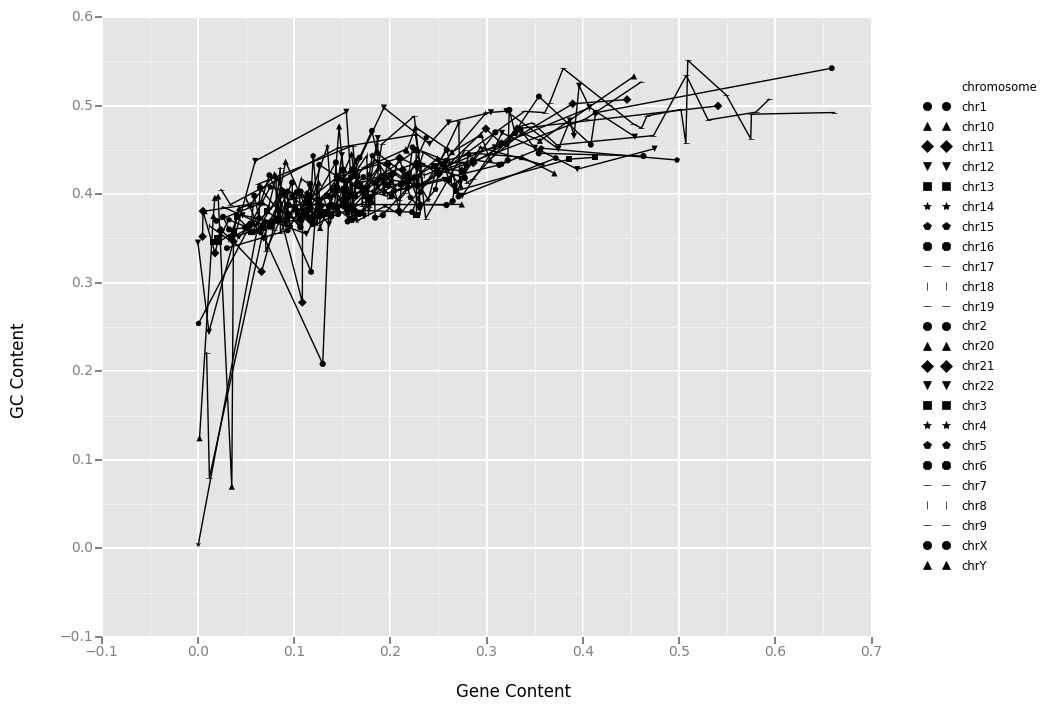

<ggplot: (300626941)>

In [17]:
# we can also use lines instead of points
p = ggplot(aes(x='gene_content', \
               y='gc_content', shape='chromosome'), \
               data=human) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p + geom_line()
p

In [21]:
# problem here is that there are so many chromosomes
# that this is hard to interpret anything
# what if we could plot each separately
# can do this by subsetting and plotting
chr1 = human[human['chromosome'] == 'chr1']
chr1.tail()

,chromosome,win_start,win_end,n_bases,gc_bases,exon_bases,simple_rep_bases,complex_rep_bases,gc_content,gene_content
15,chr1,186717315,199165136,0,4365525,862937.0,199194.0,6229811.0,0.350706,0.069324
16,chr1,199165136,211612957,0,5454808,4008941.0,171827.0,5740001.0,0.438214,0.322060
17,chr1,211612957,224060778,50000,4923371,1899049.0,160308.0,5893280.0,0.395521,0.152561
18,chr1,224060778,236508599,50000,5390526,3898700.0,202608.0,6221255.0,0.433050,0.313203
19,chr1,236508599,248956422,10002,5003555,2178289.0,176246.0,6161794.0,0.401962,0.174994


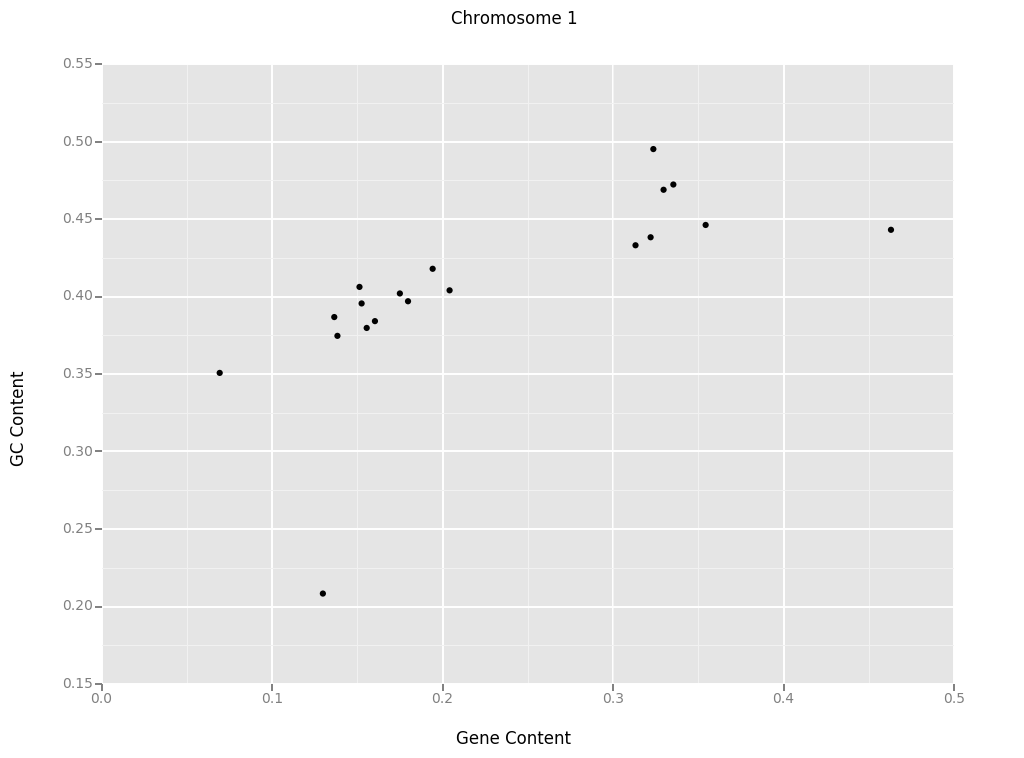

<ggplot: (300660074)>

In [24]:
# now we can just plot chr1 as points
# let's add a title also
p = ggplot(aes(x='gene_content', \
               y='gc_content'), \
               data=chr1) \
+ xlab("Gene Content") + ylab("GC Content") \
+ ggtitle("Chromosome 1")
p + geom_point()
p

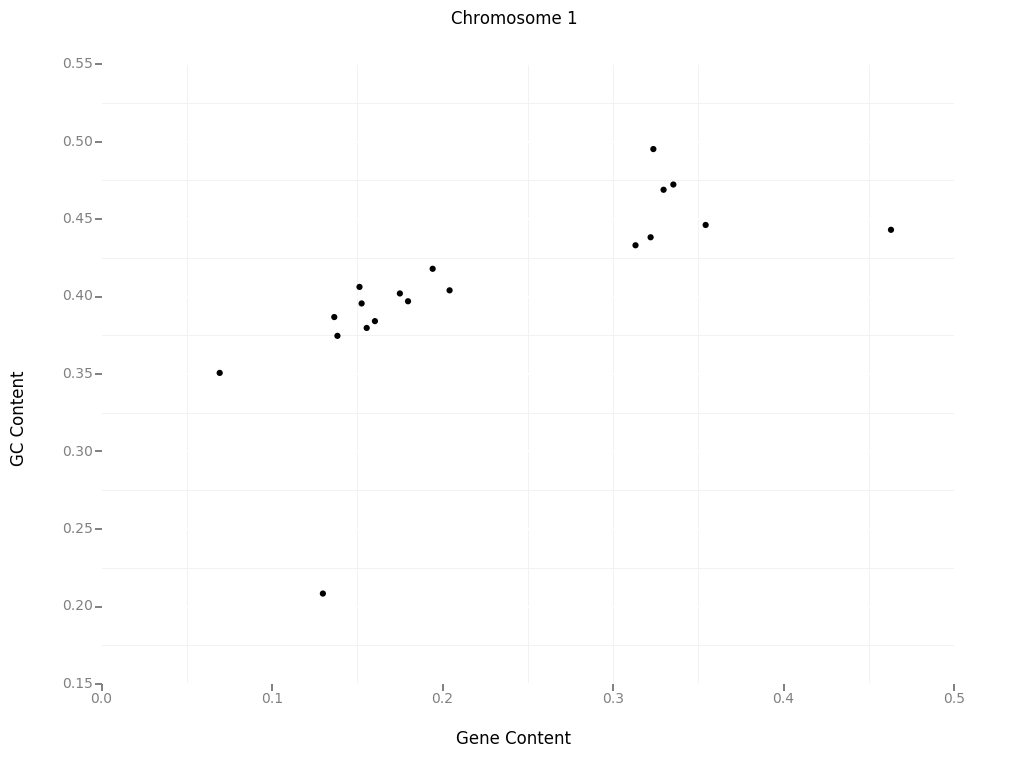

<ggplot: (301503415)>

In [25]:
# finally, what if we don't like this gray background
# we can use themes to change this
# a couple are built into ggplot
# we can do a simple 'black and white'
p = ggplot(aes(x='gene_content', \
               y='gc_content'), \
               data=chr1) \
+ xlab("Gene Content") + ylab("GC Content") \
+ ggtitle("Chromosome 1")
p + geom_point()
p + theme_bw()
p

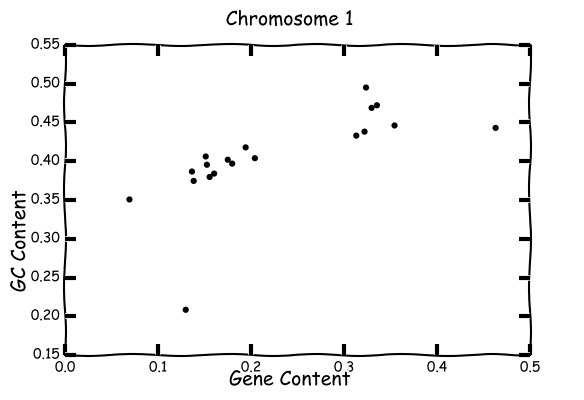

<ggplot: (-9223372036560628185)>

In [27]:
# there is a built in theme for xkcd
p = ggplot(aes(x='gene_content', \
               y='gc_content'), \
               data=chr1) \
+ xlab("Gene Content") + ylab("GC Content") \
+ ggtitle("Chromosome 1")
p + geom_point()
p + theme_xkcd()
p
# unfortunately, not many themes available for 
# ggplot in Python right now

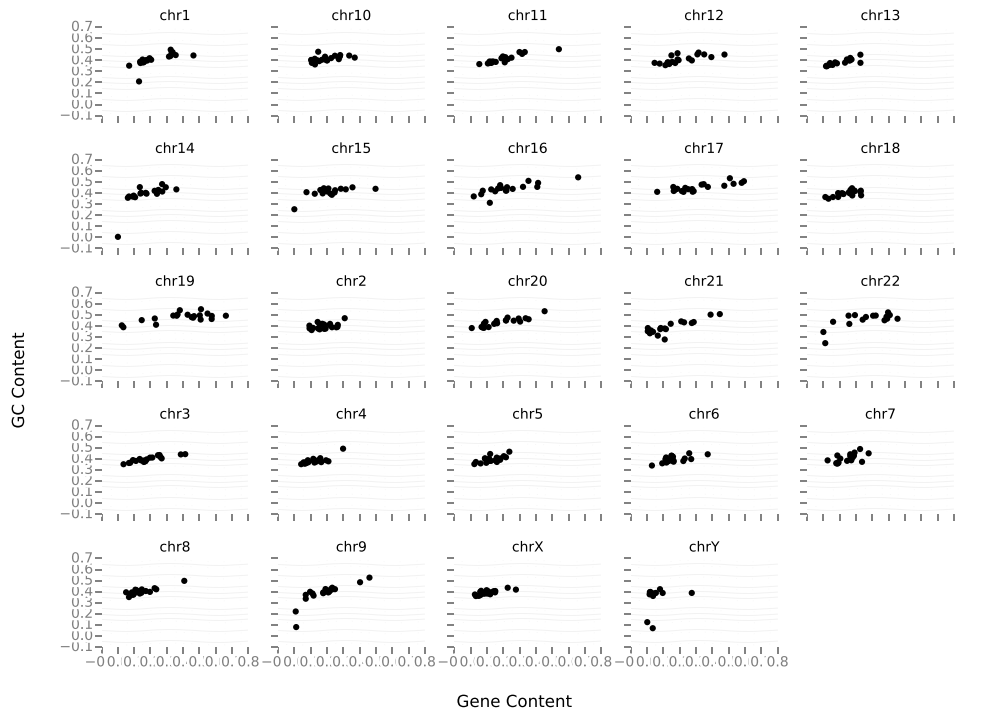

<ggplot: (305457114)>

In [35]:
# one problem with subsetting is that it is more 
# labor intensive, or requires a loop
# ggplot can help us easily get around that
p = ggplot(aes(x='gene_content', \
               y='gc_content'), data=human) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p + facet_wrap("chromosome")
p + theme_bw()
p

/Users/darencard/.local/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


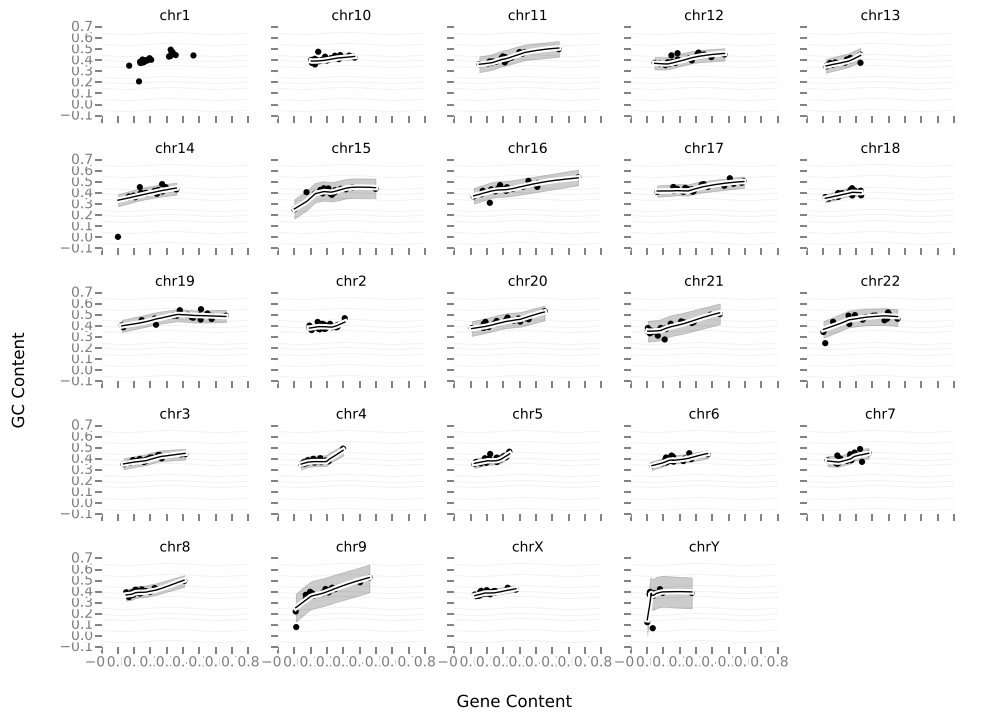

<ggplot: (-9223372036536501325)>

In [44]:
## ggplot makes it easy to add trendlines too
p = ggplot(aes(x='gene_content', \
               y='gc_content'), data=human) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p + stat_smooth()
p + facet_wrap("chromosome")
p + theme_bw()
p

/Users/darencard/.local/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


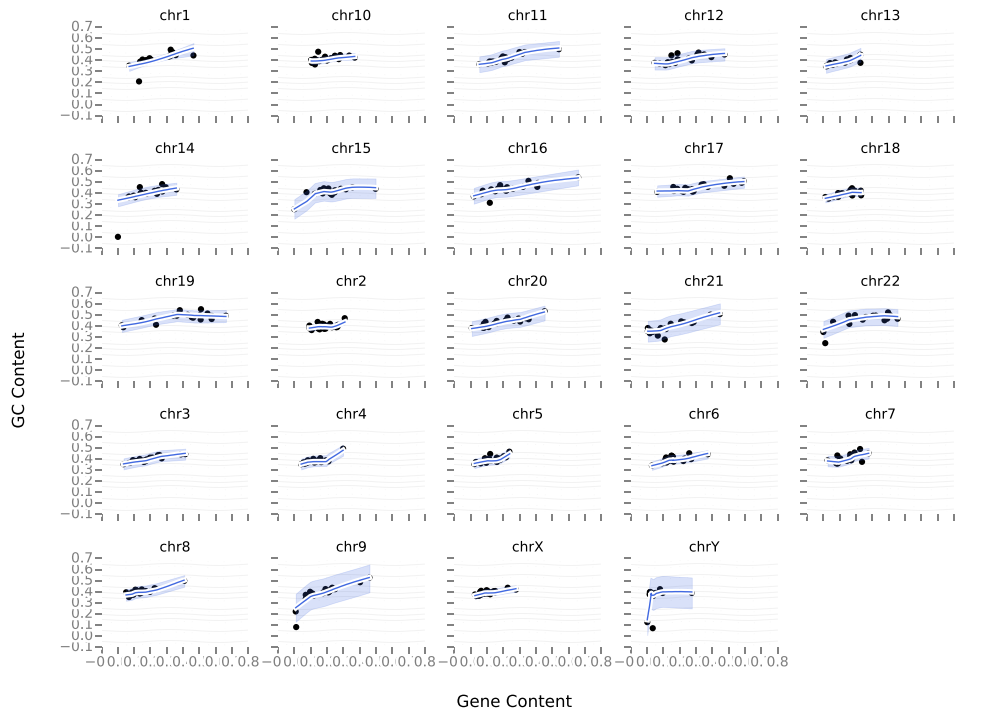

<ggplot: (-9223372036539258066)>

In [41]:
# it appears that NaNs are creating issues with the lines
# can fix easily
# can also change color of lines
p = ggplot(aes(x='gene_content', \
               y='gc_content'), data=human.dropna()) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p + stat_smooth(color='royalblue')
p + facet_wrap("chromosome")
p + theme_bw()
p

/Users/darencard/.local/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


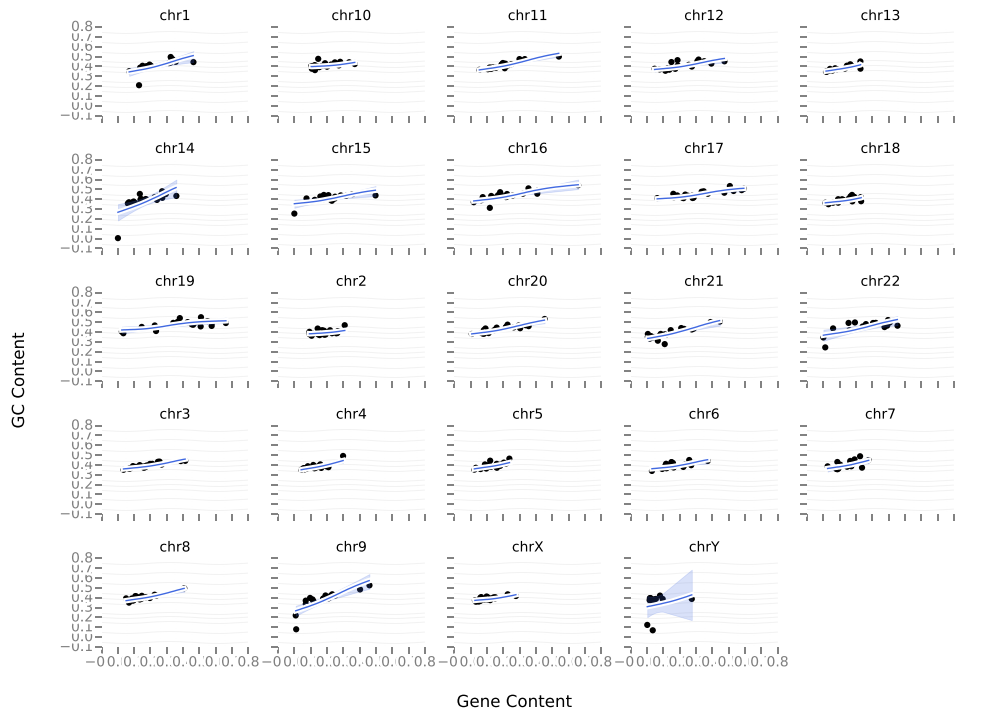

<ggplot: (311568858)>

In [39]:
# or based on a linear model
p = ggplot(aes(x='gene_content', \
               y='gc_content'), data=human.dropna()) \
+ xlab("Gene Content") + ylab("GC Content")
p + geom_point()
p + stat_smooth(method='lm', color='royalblue')
p + facet_wrap("chromosome")
p + theme_bw()
p

- Have students save this file as `ggplot_plotting`

## Tidy Data and Analysis

- have went through a pretty full data processing workflow
- let's say you show to your boss and he is pleased
- but a collaborator just finished collecting the same type of data on chicken
- he or she has stored the data up on GitHub
- we need to download it and your boss wants to see the same type of plots with that dataset, which should be quick and easy
- let's first download
```shell
# move back to `swc_dec2012` directory
git clone https://github.com/darencard/chicken.git
```
- now the students should open a new Jupyter notebook called `chicken_analysis`

#### \~\~Challenge\~\~
Load the chicken data into your notebook using 'pandas' and explore it briefly.

In [45]:
import pandas as pd

In [48]:
chicken = pd.read_csv("chicken_messy.txt", sep="\t")
chicken.head()

,window,chr1-win_start,chr1-win_end,chr1-n_bases,chr1-gc_bases,chr1-exon_bases,chr1-simple_rep_bases,chr1-complex_rep_bases,chr2-win_start,chr2-win_end,...,chrW-exon_bases,chrW-simple_rep_bases,chrW-complex_rep_bases,chrZ-win_start,chrZ-win_end,chrZ-n_bases,chrZ-gc_bases,chrZ-exon_bases,chrZ-simple_rep_bases,chrZ-complex_rep_bases
0,window1,0,9810127,2955,4159054,1201046,205720,1192234,0,7478036,...,7615.0,1139,160540,0,4115508,6000,1750605,601868,105150,463654
1,window2,9810127,19620254,3147,3792680,1078114,176362,1194846,7478036,14956072,...,NaN,374,93304,4115508,8231016,200,1675407,322282,124573,690661
2,window3,19620254,29430381,3400,3778401,983008,148330,1004293,14956072,22434108,...,3572.0,453,176333,8231016,12346524,0,1768393,1202316,60953,506967
3,window4,29430381,39240508,1663,3916309,1312088,133134,909764,22434108,29912144,...,924.0,1262,195911,12346524,16462032,0,1595571,367748,76683,637438
4,window5,39240508,49050635,7533,3834383,1377817,163952,928686,29912144,37390180,...,NaN,3493,173006,16462032,20577540,0,1620347,396006,66477,628892


- look at how ugly this data is
- your collaborator has collected each piece of data in separate columns
- data like this, which is very wide and typically has lots of columns and fewer rows is called *messy* data
- you can compare it to the data we've been working with so far, which is considered *tidy* data
- let's spend some time *tidying* these data

In [50]:
# pandas provides some functionality that improves 
# things with a command called melt()
tidy_chicken = pd.melt(chicken, 
               id_vars='window', 
               var_name='statistic', 
               value_name='value')
tidy_chicken.head()

,window,statistic,value
0,window1,chr1-win_start,0.0
1,window2,chr1-win_start,9810127.0
2,window3,chr1-win_start,19620254.0
3,window4,chr1-win_start,29430381.0
4,window5,chr1-win_start,39240508.0


In [51]:
# functions for the apply function
def parse_chr(s):
    return s.split("-")[0]
def parse_stat(s):
    return s.split("-")[1]

In [52]:
# this has made our data 'long', which is more tidy
# but the statistic and the chromosome information 
# is still merged into one column
# we'll use another useful pandas 
tidy_chicken['chromosome'] = \
tidy_chicken['statistic'].apply(parse_chr)
tidy_chicken['stat'] = \
tidy_chicken['statistic'].apply(parse_stat)
tidy_chicken.head()

,window,statistic,value,chromosome,stat
0,window1,chr1-win_start,0.0,chr1,win_start
1,window2,chr1-win_start,9810127.0,chr1,win_start
2,window3,chr1-win_start,19620254.0,chr1,win_start
3,window4,chr1-win_start,29430381.0,chr1,win_start
4,window5,chr1-win_start,39240508.0,chr1,win_start


In [56]:
# things still aren't ideal, tidier but not as ideal as our human dataset
# we have to use subset and joining to merge our genome
# characteristics so they are side-by-side for each chromosome/window
# lets do this with chr1 and win_start/win_end
win_start = tidy_chicken[tidy_chicken['chromosome'] == 'chr1']\
                [tidy_chicken['stat'] == 'win_start']
win_end = tidy_chicken[tidy_chicken['chromosome'] == 'chr1']\
                [tidy_chicken['stat'] == 'win_end']
win_end.head()

/Users/darencard/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/darencard/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,window,statistic,value,chromosome,stat
20,window1,chr1-win_end,9810127.0,chr1,win_end
21,window2,chr1-win_end,19620254.0,chr1,win_end
22,window3,chr1-win_end,29430381.0,chr1,win_end
23,window4,chr1-win_end,39240508.0,chr1,win_end
24,window5,chr1-win_end,49050635.0,chr1,win_end


In [68]:
# now we can merge the two together based on common data columns 
# chromosome and window
merge = win_start.merge(win_end, on=['window', 'chromosome'], \
                                suffixes=['_start', '_end'])
merge.head()
# then we could trim out columns we don't want
merge.drop(['window', 'statistic_start', 'statistic_end', \
            'stat_start', 'stat_end'], axis=1, inplace=True)
#  and reorder
merge = merge[['chromosome', 'value_start', 'value_end']]
# and rename using a dictionary
merge.rename(columns={'value_start' : 'win_start', \
                      'value_end' : 'win_end'}, 
            inplace=True)
merge.head()

,chromosome,win_start,win_end
0,chr1,0.0,9810127.0
1,chr1,9810127.0,19620254.0
2,chr1,19620254.0,29430381.0
3,chr1,29430381.0,39240508.0
4,chr1,39240508.0,49050635.0


- that's cool, but it would take forever to do on all chromosomes and statistics
- using loops can help with this
- let's plan this out with pseudocode as a Challenge

In [69]:
# for each chromosome
    # for each statistic
        # merge statistics using 'chromsome' & 'window'
        # so they are side-by-side
    # concatenate each chromsome together top to bottom
# drop trash columns we don't need
# rename with appropriate headers

In [71]:
# create chromosomes list
chromosomes = pd.unique(tidy_chicken['chromosome'])
chromosomes

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
       'chr23', 'chr24', 'chr25', 'chr26', 'chr27', 'chr28', 'chr32',
       'chrW', 'chrZ'], dtype=object)

In [72]:
# create statistics list
statistics = pd.unique(tidy_chicken['stat'])
statistics

array(['win_start', 'win_end', 'n_bases', 'gc_bases', 'exon_bases',
       'simple_rep_bases', 'complex_rep_bases'], dtype=object)

In [73]:
# need counter for DataFrame initialization
chr_counter = 1
# for each chromosome
for chromosome in chromosomes:
    # print chromsome number to watch progress
    print(chromosome)
    # need another counter for DataFrame initialization
    stat_counter = 1
    # if this is the first chromosome we are analyzing
    if chr_counter is 1:
        # for each statistic
        for statistic in statistics:
            # if this is the first statistic
            if stat_counter is 1:
                # create a new chr DataFrame and add first statistic subset to it
                chr_df = tidy_chicken[tidy_chicken['chromosome'] == chromosome]\
                [tidy_chicken['stat'] == statistic][['chromosome','window','value']]
            # if this is beyond the first statistic
            else:
                # subset new statistic/chromosome
                new_df = tidy_chicken[tidy_chicken['chromosome'] == chromosome]\
                            [tidy_chicken['stat'] == statistic]
                # create a proper suffix for new stat
                suffix = ''.join(['_',statistic])
                # merge the full dataframe and this new stat subset
                chr_df = chr_df.merge(new_df[['chromosome','window','value']], \
                                      on=['window', 'chromosome'], \
                                      suffixes=['',suffix])
            # increase stat counter
            stat_counter += 1
        # once full set of stats from chromosome is together, initialize output dataframe
        full_df = chr_df
    # if this is beyond the first chromosome we are analyzing        
    else:
        # for each statistic
        for statistic in statistics:
            # if this is the first statistic
            if stat_counter is 1:
                # create a new chr DataFrame and add first statistic subset to it
                chr_df = tidy_chicken[tidy_chicken['chromosome'] == chromosome]\
                [tidy_chicken['stat'] == statistic][['chromosome','window','value']]
            # if this is beyond the first statistic
            else:
                # subset new statistic/chromosome
                new_df = tidy_chicken[tidy_chicken['chromosome'] == chromosome]\
                            [tidy_chicken['stat'] == statistic]
                # create a proper suffix for new stat
                suffix = ''.join(['_',statistic])
                # merge the full dataframe and this new stat subset
                chr_df = chr_df.merge(new_df[['chromosome','window','value']], \
                                      on=['window', 'chromosome'], \
                                      suffixes=['',suffix])
            # increase stat counter
            stat_counter += 1
        # once full set of stats from chromosome is together
        # concatenate to full output dataframe
        full_df = pd.concat([full_df, chr_df], ignore_index=True)
    # increase chromosome counter
    chr_counter += 1

# rename existing columns to make it consistent with human dataset
full_df.rename(columns={'value': 'win_start', \
                        'value_win_end': 'win_end', \
                        'value_n_bases': 'n_bases', \
                        'value_gc_bases': 'gc_bases', \
                        'value_exon_bases': 'exon_bases', \
                        'value_simple_rep_bases': 'simple_rep_bases', \
                        'value_complex_rep_bases': 'complex_rep_bases', \
                       }, inplace=True)
# delete the 'window' column because we don't need it
full_df.drop('window', axis=1, inplace=True)
# print result
print(full_df)

chr1
chr2
chr3
chr4
chr5
chr6


/Users/darencard/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/darencard/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/darencard/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/darencard/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chr23
chr24
chr25
chr26
chr27
chr28
chr32
chrW
chrZ
    chromosome    win_start      win_end   n_bases   gc_bases  exon_bases  \
0         chr1          0.0    9810127.0    2955.0  4159054.0   1201046.0   
1         chr1    9810127.0   19620254.0    3147.0  3792680.0   1078114.0   
2         chr1   19620254.0   29430381.0    3400.0  3778401.0    983008.0   
3         chr1   29430381.0   39240508.0    1663.0  3916309.0   1312088.0   
4         chr1   39240508.0   49050635.0    7533.0  3834383.0   1377817.0   
5         chr1   49050635.0   58860762.0     730.0  4236329.0   2049895.0   
6         chr1   58860762.0   68670889.0     859.0  4051397.0   2416806.0   
7         chr1   68670889.0   78481016.0  503732.0  3858325.0   1938244.0   
8         chr1   78481016.0   88291143.0   76345.0  4077087.0   2028009.0   
9         chr1   88291143.0   98101270.0   54589.0  3746949.0   1363685.0   
10      

#### \~\~Challenge\~\~
Now that we have a chicken dataset, practice your `ggplot` plotting and make some appropriate plots. If you are feeling ambitious, you can also load in the human dataset and compare them in some way.

## Using Markdown to Narrate your Work
- Jupyter notebooks are great for displaying commands and results in a notebook form that can be easily shared with others
- However, often need more information to interpret the goals, methods, results, and conclusions of an analysis
- 'Markdown' can be used to achieve this